In [1]:
import cv2
import os
import sys
import random
import math
import re
import time
import numpy as np
import tensorflow as tf
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from skimage import io

# Root directory of the project
ROOT_DIR = os.path.abspath("../../../../")

# Import Mask RCNN
sys.path.append(ROOT_DIR)  # To find local version of the library
from mrcnn import utils
from mrcnn import visualize
from mrcnn.visualize import display_images
import mrcnn.model as modellib
from mrcnn.model import log

import nucleus

%matplotlib inline 

# Directory to save logs and trained model
LOGS_DIR = os.path.join(ROOT_DIR, "data/maskrcnn")

# Dataset directory
DATASET_DIR = os.path.join(ROOT_DIR, "data/nucleus")

# Inference Configuration
config = nucleus.NucleusInferenceConfig()
config.display()

# Device to load the neural network on.
# Useful if you're training a model on the same 
# machine, in which case use CPU and leave the
# GPU for training.
DEVICE = "/cpu:0"  # /cpu:0 or /gpu:0
DEVICE = "/gpu:0"  # /cpu:0 or /gpu:0

# Inspect the model in training or inference modes
# values: 'inference' or 'training'
# Only inference mode is supported right now
TEST_MODE = "inference"

def get_ax(rows=1, cols=1, size=16):
    """Return a Matplotlib Axes array to be used in
    all visualizations in the notebook. Provide a
    central point to control graph sizes.
    
    Adjust the size attribute to control how big to render images
    """
    fig, ax = plt.subplots(rows, cols, figsize=(size*cols, size*rows))
    fig.tight_layout()
    return ax

# Create model in inference mode
with tf.device(DEVICE):
    model = modellib.MaskRCNN(mode="inference",
                              model_dir=LOGS_DIR,
                              config=config)
    
# Load model weights from the precised path
# Path to a specific weights file
# weights_path = "/path/to/mask_rcnn_nucleus.h5"
weights_path = os.path.join(ROOT_DIR, "data/maskrcnn/mask_rcnn_nucleus_0151.h5"

# Or, load the last model you trained
# weights_path = model.find_last()

# Load weights
print("Loading weights ", weights_path)
model.load_weights(weights_path, by_name=True)

2021-11-26 18:25:12.416997: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0


Using TensorFlow backend.



Configurations:
BACKBONE                       resnet50
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        400
DETECTION_MIN_CONFIDENCE       0
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  512
IMAGE_META_SIZE                14
IMAGE_MIN_DIM                  512
IMAGE_MIN_SCALE                2.0
IMAGE_RESIZE_MODE              pad64
IMAGE_SHAPE                    [512 512   3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE               

## Run Detection (custom) (one image)

['masks_manual', 'images_manual']


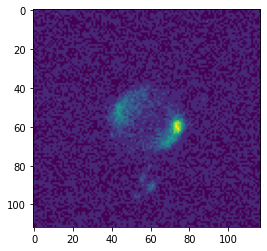

Processing 1 images
image                    shape: (112, 117, 1)         min:    0.00000  max:    9.00000  uint8
molded_images            shape: (1, 512, 576, 3)      min:  -48.22000  max:  -31.56000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  576.00000  float64
anchors                  shape: (1, 73656, 4)         min:   -0.17712  max:    1.05188  float32





2021-11-26 18:25:17.151751: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2699905000 Hz
2021-11-26 18:25:17.152338: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x554ace0 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2021-11-26 18:25:17.152365: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
2021-11-26 18:25:17.154550: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2021-11-26 18:25:17.233618: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1082] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-11-26 18:25:17.234042: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x29caa80 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2021-11-26 18:25:1

2021-11-26 18:25:17.634708: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1206] Device interconnect StreamExecutor with strength 1 edge matrix:
2021-11-26 18:25:17.634744: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1212]      0 
2021-11-26 18:25:17.634753: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1225] 0:   N 
2021-11-26 18:25:17.634962: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1082] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-11-26 18:25:17.635408: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1082] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-11-26 18:25:17.635756: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1351] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 2259 MB memory) -> physical GPU (device: 0, name: Quadro T100

(112, 117, 3)


NameError: name 'dataset' is not defined

In [2]:
# load a 3D image
print(os.listdir(DATASET_DIR))
IMAGES_DIR = os.path.join(DATASET_DIR,'images_manual')
images_names = os.listdir(IMAGES_DIR)
images = io.imread(IMAGES_DIR + '/' + images_names[2])

# loads one slice only
image = images[len(images)//2+4]

# converts the image to fit it to the network
image = cv2.convertScaleAbs(image, alpha=(255.0/65535.0))
image = image.astype(np.uint8)

plt.imshow(image)
plt.show()

image = np.expand_dims(image,-1)

# prediction
results = model.detect([image],verbose=1)
r = results[0]

# transforms the image into rgb to display it
image = np.tile(image, [1,1,3])
print(image.shape)

# displays the mask
visualize.display_instances(image, 
                            r['rois'], r['masks'], r['class_ids'], dataset.class_names,
                            r['scores'])

# saves the mask
mask = r['masks'].astype(np.uint8)*255
io.imsave('../../temp/test.png', mask)




## Run Detection (custom) (one 3D image)

In [3]:
# load a 3D image
print(os.listdir(DATASET_DIR))
IMAGES_DIR = os.path.join(DATASET_DIR,'images_manual')
images_names = os.listdir(IMAGES_DIR)
images = io.imread(IMAGES_DIR + '/' + images_names[0])

# loads one slice only
mask_stack = []
for i in range(len(images)):
    image = images[i]

    # converts the image to fit it to the network
    image = cv2.convertScaleAbs(image, alpha=(255.0/65535.0))
    image = image.astype(np.uint8)

#     plt.imshow(image)
#     plt.show()

    image = np.expand_dims(image,-1)

    # prediction
#     results = model.detect([image],verbose=1)
    results = model.detect([image])
    r = results[0]
    
    
    # retrieves the mask
    mask = r['masks']
#     plt.imshow(mask)
#     print(mask.shape)
    
    
    gray = np.zeros((mask.shape[0],mask.shape[1],1))
    if mask.shape[-1] > 0:
        mask = (np.sum(mask, -1, keepdims=True) >= 1)
        splash = np.where(mask, image, gray).astype(np.uint8)*255
    else:
        splash = gray.astype(np.uint8)
    
    mask_stack += [splash]
    


mask_stack = np.squeeze(np.array(mask_stack))
print(mask_stack.shape)
io.imsave(ROOT_DIR+'/data/maskrcnn/preds{}'.format(images_names[0]), mask_stack)




['masks_manual', 'images_manual']
(63, 217, 119)


/tmp/ipykernel_110/782799474.py:46: UserWarning: /home/data/maskrcnn/KAKU4-wt--CRWN1-wt--CRWN4-wt_Cot_J13_STD_FIXE_H258_U1_0_C0.tif is a low contrast image
  io.imsave(ROOT_DIR+'/data/maskrcnn/{}'.format(images_names[0]), mask_stack)


## Run Detection (custom) (many 3D images)

In [6]:
# load a 3D image
print(os.listdir(DATASET_DIR))

# put the path to the image directory just below:
IMAGES_DIR = os.path.join(DATASET_DIR,'images_manual')
images_names = os.listdir(IMAGES_DIR)

for j in range(300,len(images_names)):
    images = io.imread(IMAGES_DIR + '/' + images_names[j])

    # loads one slice only
    mask_stack = []
    for i in range(len(images)):
        image = images[i]

        # converts the image to fit it to the network
        image = cv2.convertScaleAbs(image, alpha=(255.0/65535.0))
        image = image.astype(np.uint8)

    #     plt.imshow(image)
    #     plt.show()

        image = np.expand_dims(image,-1)

        # prediction
    #     results = model.detect([image],verbose=1)
        results = model.detect([image])
        r = results[0]


        # retrieves the mask
        mask = r['masks']
    #     plt.imshow(mask)
    #     print(mask.shape)


        gray = np.zeros((mask.shape[0],mask.shape[1],1))
        if mask.shape[-1] > 0:
            mask = (np.sum(mask, -1, keepdims=True) >= 1)
            splash = np.where(mask, image, gray).astype(np.uint8)*255
        else:
            splash = gray.astype(np.uint8)

        mask_stack += [splash]



    mask_stack = np.squeeze(np.array(mask_stack))
    print(mask_stack.shape)
    io.imsave(ROOT_DIR+'/data/maskrcnn/preds/{}'.format(images_names[j]), mask_stack)




['masks_manual', 'images_manual']
(59, 112, 118)


/tmp/ipykernel_110/2686403356.py:50: UserWarning: /home/data/maskrcnn/KAKU4-wt--CRWN1-wt--CRWN4-wt_Cot_J13_STD_FIXE_H258_V3_4_C0.tif is a low contrast image
  io.imsave(ROOT_DIR+'/data/maskrcnn/{}'.format(images_names[j]), mask_stack)


(55, 117, 115)


/tmp/ipykernel_110/2686403356.py:50: UserWarning: /home/data/maskrcnn/KAKU4-wt--CRWN1-wt--CRWN4-wt_Cot_J13_STD_FIXE_H258_R1_29_C0.tif is a low contrast image
  io.imsave(ROOT_DIR+'/data/maskrcnn/{}'.format(images_names[j]), mask_stack)


(55, 110, 113)


/tmp/ipykernel_110/2686403356.py:50: UserWarning: /home/data/maskrcnn/KAKU4-wt--CRWN1-wt--CRWN4-wt_Cot_J13_STD_FIXE_H258_T2_27_C0.tif is a low contrast image
  io.imsave(ROOT_DIR+'/data/maskrcnn/{}'.format(images_names[j]), mask_stack)


(56, 123, 114)


/tmp/ipykernel_110/2686403356.py:50: UserWarning: /home/data/maskrcnn/KAKU4-wt--CRWN1-wt--CRWN4-wt_Cot_J13_STD_FIXE_H258_T3_2_C0.tif is a low contrast image
  io.imsave(ROOT_DIR+'/data/maskrcnn/{}'.format(images_names[j]), mask_stack)


KeyboardInterrupt: 